In [118]:
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np

import plasmapy.diagnostics.thomson as thomson

Define sets of parameters for a variety of example cases

In [122]:
# A single-species and stationary hydrogen plasma with densities and temperatures that mean scattering is
# dominated by single-electron scattering (rather than collective multi-particle scattering)
non_collective = {'name':'Non-Collective Regime', 'ne':5e15*u.cm**-3, 'Te':40*u.eV, 'Ti':np.array([10])*u.eV,
                  'fract':np.array([1]), 'ion_z':np.array([1]), 'ion_mu':np.array([1]),
                  'fluid_vel':np.array([0, 0, 0])*u.km/u.s, 'ion_vel':np.array([[0, 0, 0]])*u.km/u.s}

# A single-species and stationary hydrogen plasma with densities and temperatures that mean scattering is
# weakly collective (scattering paramter alpha approaching 1)
weakly_collective = {'name':'Weakly Collective Regime', 'ne':2e17*u.cm**-3, 'Te':20*u.eV, 'Ti':np.array([10])*u.eV,
                  'fract':np.array([1]), 'ion_z':np.array([1]), 'ion_mu':np.array([1]),
                  'fluid_vel':np.array([0, 0, 0])*u.km/u.s, 'ion_vel':np.array([[0, 0, 0]])*u.km/u.s}

# A single-species and stationary hydrogen plasma with densities and temperatures that mean scattering is
# dominated by multi-particle scattering, including scattering off of ions.
collective = {'name':'Collective Regime', 'ne':5e17*u.cm**-3, 'Te':10*u.eV, 'Ti':np.array([4])*u.eV,
              'fract':np.array([1]), 'ion_z':np.array([1]), 'ion_mu':np.array([1]),
              'fluid_vel':np.array([0, 0, 0])*u.km/u.s, 'ion_vel':np.array([[0, 0, 0]])*u.km/u.s}

# Identical to the collective example above, except now the electron fluid has a substantial drift velocity parallel to the
# probe laser and the ions have a drift (relative to the electrons) at an angle.
drifts = {'name':'Drift Velocities', 'ne':5e17*u.cm**-3, 'Te':10*u.eV, 'Ti':np.array([10])*u.eV,
          'fract':np.array([1]), 'ion_z':np.array([1]), 'ion_mu':np.array([1]),
          'fluid_vel':np.array([700, 0, 0])*u.km/u.s, 'ion_vel':np.array([[-600, -100, 0]])*u.km/u.s}

# Identical to the collective example, except now the plasma consists 25% He+1 and 75% C+5
two_species = {'name':'Two Ion Species', 'ne':5e17*u.cm**-3, 'Te':10*u.eV, 'Ti':np.array([10, 50])*u.eV,
               'fract':np.array([.25, .75]), 'ion_z':np.array([1,5]), 'ion_mu':np.array([4,12]),
               'fluid_vel':np.array([0, 0, 0])*u.km/u.s, 'ion_vel':np.array([[0, 0, 0],[0, 0, 0]])*u.km/u.s}

examples = [non_collective, weakly_collective, collective, drifts, two_species]

Define some parameters that we won't change between the examples

In [120]:
# The probe wavelength can in theory be anything, but in practice integer frequency multiples of the Nd:YAG wavelength
# 1064 nm are used (532 corresponds to a frequency-doubled probe beam from such a laser).
probe_wavelength = 532*u.nm

# Wavelengths over which to calcualte the spectral distribution
wavelength = np.arange(probe_wavelength.value-60, probe_wavelength.value+60, 0.01)*u.nm

# The scattering geometry is defined by unit vectors for the orientation of the probe laser beam (probe_n) and
# the path from the scattering volume (where the measurement is made) to the detector (scatter_n).
# These can be setup for any experimental geometry.
probe_n = np.array([1, 0, 0])
scattering_angle = np.deg2rad(90)
scatter_n = np.array([np.cos(scattering_angle), np.sin(scattering_angle), 0])

For each example, plot the the spectral distribution function over a large range to show the broad electron scattering feature (top row) and a narrow range around the probe wavelength to show the ion scattering feature (bottom row)

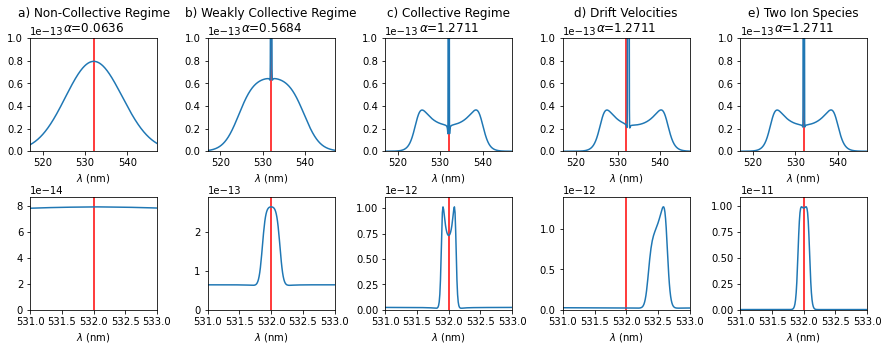

In [124]:
fig, ax = plt.subplots(ncols=len(examples), nrows=2, figsize=[15,5])
fig.subplots_adjust( wspace=0.4, hspace=0.4)

lbls = 'abcdefg'

for i, x in enumerate(examples):
    
    alpha, Skw = thomson.spectral_density(wavelength, probe_wavelength=probe_wavelength,
                     ne=x['ne'], fract =x['fract'], Te=x['Te'], Ti=x['Ti'],
                     ion_z=x['ion_z'], ion_mu=x['ion_mu'], ion_vel=x['ion_vel'], fluid_vel=x['fluid_vel'],
                     probe_n=probe_n, scatter_n=scatter_n)
    
    ax[0][i].axvline(x=probe_wavelength.value, color='red')  # Mark the probe wavelength
    ax[0][i].plot(wavelength, Skw)
    ax[0][i].set_xlim(probe_wavelength.value-15, probe_wavelength.value+15)
    ax[0][i].set_ylim(0, 1e-13)
    ax[0][i].set_xlabel('$\lambda$ (nm)')
    
    ax[0][i].set_title( lbls[i] + ') ' + x['name'] + '\n$\\alpha$={:.4f}'.format(alpha))

    
    ax[1][i].axvline(x=probe_wavelength.value, color='red')  # Mark the probe wavelength
    ax[1][i].plot(wavelength, Skw)
    ax[1][i].set_xlim(probe_wavelength.value-1, probe_wavelength.value+1)
    ax[1][i].set_ylim(0, 1.1*np.max(Skw.value))
    ax[1][i].set_xlabel('$\lambda$ (nm)')
    
    

Plots of the spectral density function (Skw) which determines the amount of light scattered into different wavelengths.
- a) In the non-collective regime only the electron feature is visible.
- b) In the weakly collective regime (alpha approaches 1) an ion feature starts to appear and the electron feature is distorted
- c) In the collective regime both features split into two peaks, corresponding to scattering off of forward and backwards propagating plasma oscillations. 
- d) The introduction of drift velocities introduces several Doppler shifts in the calculations, resulting in a shifted spectrum.
- e) Changing the ion species present changes the resulting ion feature.